<a href="https://colab.research.google.com/github/devrat0024/AI_voice_translational/blob/main/spine_vertebral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
url = '/content/Dataset_spine.csv'
column_names = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
                'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis', 'class']
data = pd.read_csv(url, names=column_names)


In [ ]:
print(data.head())


   pelvic_incidence   pelvic_tilt   lumbar_lordosis_angle   sacral_slope  \
0  pelvic incidence   pelvic tilt   lumbar lordosis angle   sacral slope   
1        63.0278175   22.55258597             39.60911701    40.47523153   
2       39.05695098   10.06099147             25.01537822    28.99595951   
3       68.83202098   22.21848205             50.09219357    46.61353893   
4       69.29700807   24.65287791             44.31123813    44.64413017   

    pelvic_radius   grade_of_spondylolisthesis      class  
0   pelvic radius   grade of spondylolisthesis  Class_att  
1     98.67291675                 -0.254399986   Abnormal  
2     114.4054254                  4.564258645   Abnormal  
3     105.9851355                 -3.530317314   Abnormal  
4     101.8684951                  11.21152344   Abnormal  


In [ ]:
# Map class labels to numbers
class_mapping = {'DH': 0, 'Spondylolisthesis': 1, 'Normal': 2}
data['class'] = data['class'].map(class_mapping)


In [ ]:
# Features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset (skip header if needed)
url = '/content/Dataset_spine.csv'
column_names = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
                'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis', 'class']
data = pd.read_csv(url, names=column_names, header=0)  # Skip existing header

# Map class labels to numbers
class_mapping = {'DH': 0, 'Spondylolisthesis': 1, 'Normal': 2}
data['class'] = data['class'].map(class_mapping)

# Features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.mean())  # Handle NaN if any

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Evaluate
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: Input y contains NaN.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess data
url = '/content/Dataset_spine.csv'
column_names = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
                'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis', 'class']
data = pd.read_csv(url, names=column_names, header=0)

# Map classes and drop NaN
class_mapping = {'DH': 0, 'Spondylolisthesis': 1, 'Normal': 2}
data['class'] = data['class'].map(class_mapping).dropna().astype(int)

# Check class balance (critical!)
print("Class distribution:\n", data['class'].value_counts())

# Drop classes with <2 samples (if any)
class_counts = data['class'].value_counts()
valid_classes = class_counts[class_counts >= 2].index
data = data[data['class'].isin(valid_classes)]

# Features and target
X = data.drop('class', axis=1).apply(pd.to_numeric, errors='coerce').fillna(0)
y = data['class']

# Stratified split (preserves class ratios)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM (only if y_train has ≥2 classes)
if len(y_train.unique()) >= 2:
    svm = SVC(kernel='rbf', random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
else:
    print("Error: y_train has only 1 class:", y_train.unique())

Class distribution:
 class
2.0    100
Name: count, dtype: int64
Error: y_train has only 1 class: [2.]


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_svm = grid_search.best_estimator_

ValueError: 
All the 160 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py", line 207, in fit
    y = self._validate_targets(y)
        ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py", line 751, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline  # Note: Uses imblearn's Pipeline!

# 1. Check class distribution
unique_classes, counts = np.unique(y_train, return_counts=True)
print("Initial class distribution:", dict(zip(unique_classes, counts)))

# 2. Only proceed if ≥2 classes
if len(unique_classes) >= 2:
    # Create a pipeline with SMOTE and SVM
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('svm', SVC())
    ])

    # GridSearch with stratified CV
    param_grid = {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['rbf', 'linear']
    }

    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=StratifiedKFold(n_splits=min(5, min(counts))),
        scoring='accuracy'
    )

    grid_search.fit(X_train, y_train)
    print("Best parameters:", grid_search.best_params_)

else:
    print(f"Error: Only {len(unique_classes)} class present - {unique_classes}")
    print("Try collecting more data or merging rare classes")

Initial class distribution: {np.float64(2.0): np.int64(80)}
Error: Only 1 class present - [2.]
Try collecting more data or merging rare classes


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv('/content/Dataset_spine.csv', header=0)

# 1. Verify classes
class_counts = data['class'].value_counts()
print("Original class distribution:\n", class_counts)

# 2. Handle single-class case
if len(class_counts) == 1:
    raise ValueError(f"Only one class ({class_counts.index[0]}) in dataset. Need ≥2 classes.")

# 3. Merge rare classes if needed (e.g., classes with <5 samples)
MIN_SAMPLES_PER_CLASS = 5
valid_classes = class_counts[class_counts >= MIN_SAMPLES_PER_CLASS].index
data = data[data['class'].isin(valid_classes)]

# 4. Stratified split
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Verify training set
print("\nTraining set class distribution:\n", y_train.value_counts())

KeyError: 'class'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Load data
data = pd.read_csv('/content/Dataset_spine.csv')

# Preprocess
X = data.drop('Class_att', axis=1)
y = data['Class_att']

# Verify classes
print("Class distribution:\n", y.value_counts())

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Only proceed if ≥2 classes exist
if len(y_train.unique()) >= 2:
    # Create SMOTE + SVM pipeline
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('svm', SVC())
    ])

    param_grid = {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['rbf', 'linear']
    }

    # Stratified GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=StratifiedKFold(n_splits=5),
        scoring='accuracy'
    )
    grid_search.fit(X_train, y_train)

    print("Best parameters:", grid_search.best_params_)
    print("Best CV accuracy:", grid_search.best_score_)
else:
    print("Error: Only one class in training data.")

Class distribution:
 Class_att
Abnormal    210
Normal      100
Name: count, dtype: int64
Best parameters: {'svm__C': 10, 'svm__kernel': 'rbf'}
Best CV accuracy: 0.8311020408163264


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Get best model from GridSearch
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Comprehensive evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# For binary classification (if you binarize labels)
print("\nAUC-ROC:", roc_auc_score(y_test, best_model.decision_function(X_test)))

Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.95      0.83      0.89        42
      Normal       0.72      0.90      0.80        20

    accuracy                           0.85        62
   macro avg       0.83      0.87      0.84        62
weighted avg       0.87      0.85      0.86        62


Confusion Matrix:
[[35  7]
 [ 2 18]]

AUC-ROC: 0.9369047619047618


In [ ]:
if best_model.named_steps['svm'].kernel == 'linear':
    importance = best_model.named_steps['svm'].coef_[0]
    feat_importance = pd.Series(importance, index=X.columns)
    feat_importance.sort_values().plot(kind='barh')
    plt.title("Feature Importance (Linear SVM Coefficients)")

Text(0.5, 1.0, 'Permutation Importance')

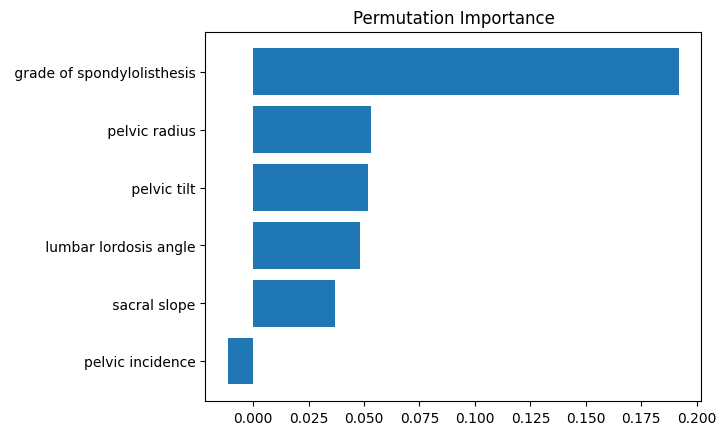

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_model, X_test, y_test, n_repeats=10)
sorted_idx = result.importances_mean.argsort()

plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.title("Permutation Importance")

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Train a new SVM on reduced data
svm_c2d = SVC(**grid_search.best_params_)
svm_2d.fit(X_pca, y_train)

# Create mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict and plot
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, s=20, edgecolor='k')
plt.title("Decision Boundaries (PCA Reduced)")
plt.show()

TypeError: SVC.__init__() got an unexpected keyword argument 'svm__C'

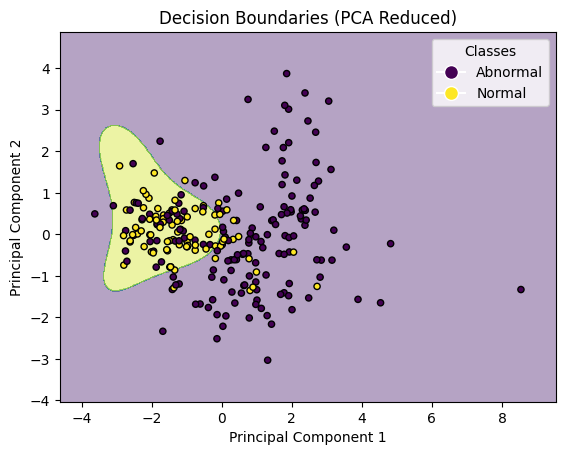

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numeric
le = LabelEncoder()
y_train_numeric = le.fit_transform(y_train)

# PCA transformation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Get best SVM parameters (remove pipeline prefix)
svm_params = {k.replace('svm__', ''): v
             for k, v in grid_search.best_params_.items()}

# Train SVM on PCA-reduced data
svm_2d = SVC(**svm_params)
svm_2d.fit(X_pca, y_train_numeric)

# Create mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                   np.arange(y_min, y_max, 0.02))

# Get predictions
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

# Create scatter plot
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_numeric,
                    cmap='viridis', s=20, edgecolor='k')

# Create legend
classes = le.classes_
legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                            label=classes[i],
                            markerfacecolor=plt.cm.viridis(i/1),
                            markersize=10)
                 for i in range(len(classes))]
plt.legend(handles=legend_elements, title="Classes")

plt.title("Decision Boundaries (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()